In [70]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号

In [71]:
data_dir=r'E:\Projects\OneDrive - somebottle\文档Documents\大数据分析Spark\期末大作业\analyses'
alias=['CO','NO2','O3','PM2.5','PM10','SO2'] # 污染物别名
dfs={} # 新建字典，用于存放读入的数据
for i in alias:
    path=os.path.join(data_dir,'./top10_concentration_'+i)
    # 获取每种污染物对应数据分析结果csv文件
    csv_file = [f for f in os.listdir(path) if f.endswith('.csv')]
    file_path=os.path.join(path,csv_file[0])
    dfs[i]=pd.read_csv(file_path) # 依次读取各污染物的TOP10时间段
    dfs[i]['监测时间']=pd.to_datetime(dfs[i]['监测时间']) # 转换为datetime

In [72]:
df_origin=pd.read_csv(
    r'E:\Projects\OneDrive - somebottle\文档Documents\大数据分析Spark\期末大作业\气象监测数据\preprocessed.csv'
)

In [73]:
df_origin['监测时间']=pd.to_datetime(df_origin['监测时间'])

In [74]:
df_origin.head(2)

,监测时间,SO2监测浓度(μg/m3),NO2监测浓度(μg/m3),PM10监测浓度(μg/m3),PM2.5监测浓度(μg/m3),O3监测浓度(μg/m3),CO监测浓度(mg/m3),温度(℃),湿度(%),气压(MBar),风速(m/s),风向(°),云量,长波辐射（W/m2）
0,2019-04-16 00:00:00,5.0,75.0,61.0,38.0,1.0,1.0,21.1,89.0,1013.0,1.2,346.5,0.038201,428.278
1,2019-04-16 01:00:00,5.0,64.0,60.0,41.0,25.0,0.8,20.4,92.0,1012.4,1.1,18.0,0.058892,427.531


In [75]:
# 将各污染物最高浓度时间段数据与原数据连接
df_joined=df_origin.copy()
for i in alias:
    # 提取出监测时间和最高浓度列，然后重命名最高浓度列
    df_temp = dfs[i][['监测时间', dfs[i].columns[1]]].rename(columns={dfs[i].columns[1]: i})
    df_temp['监测时间'] = pd.to_datetime(df_temp['监测时间'])  # 转换为datetime
    df_joined = pd.merge(df_joined, df_temp, how='left', on='监测时间')

In [78]:
df_joined[~df_joined['O3'].isnull()]

,监测时间,SO2监测浓度(μg/m3),NO2监测浓度(μg/m3),PM10监测浓度(μg/m3),PM2.5监测浓度(μg/m3),O3监测浓度(μg/m3),CO监测浓度(mg/m3),温度(℃),湿度(%),气压(MBar),风速(m/s),风向(°),云量,长波辐射（W/m2）,CO,NO2,O3,PM2.5,PM10,SO2
3062,2019-08-21 16:00:00,7.0,20.0,62.0,39.0,304.0,0.8,33.6,53.0,1002.2,1.5,101.1,0.844112,448.973,NaN,NaN,304.0,NaN,NaN,NaN
3926,2019-09-26 16:00:00,14.0,24.0,92.0,53.0,304.0,0.9,31.8,41.0,1013.4,1.3,67.7,0.475664,464.840,NaN,NaN,304.0,NaN,NaN,NaN
8722,2020-04-15 16:00:00,19.0,43.0,114.0,51.0,324.0,0.8,26.6,36.0,1010.9,1.7,88.2,0.843135,427.529,NaN,NaN,324.0,NaN,NaN,NaN
17209,2021-04-06 16:00:00,6.0,34.0,104.0,63.0,306.0,1.1,29.2,53.0,1012.7,0.8,255.2,0.850028,426.362,NaN,NaN,306.0,NaN,NaN,NaN
17210,2021-04-06 17:00:00,8.0,38.0,97.0,66.0,302.0,1.2,29.0,54.0,1012.8,0.8,257.6,0.830360,416.384,NaN,NaN,302.0,NaN,NaN,NaN
17211,2021-04-06 18:00:00,8.0,41.0,109.0,70.0,302.0,1.2,28.2,57.0,1013.3,0.6,256.3,0.809183,380.479,NaN,NaN,302.0,NaN,NaN,NaN
17782,2021-04-30 13:00:00,13.0,39.0,107.0,58.0,305.0,0.9,30.1,48.0,1010.4,1.2,24.1,0.352489,390.836,NaN,NaN,305.0,NaN,NaN,NaN
17783,2021-04-30 14:00:00,13.0,37.0,101.0,68.0,368.0,0.9,30.6,47.0,1009.5,1.2,104.0,0.355586,389.347,NaN,NaN,368.0,NaN,NaN,NaN
17784,2021-04-30 15:00:00,14.0,39.0,114.0,70.0,405.0,0.9,31.1,45.0,1008.9,1.2,207.1,0.341142,393.616,NaN,NaN,405.0,NaN,NaN,NaN
17785,2021-04-30 16:00:00,14.0,42.0,118.0,78.0,387.0,0.9,30.9,46.0,1008.3,1.1,117.2,0.243197,392.378,NaN,NaN,387.0,NaN,NaN,NaN


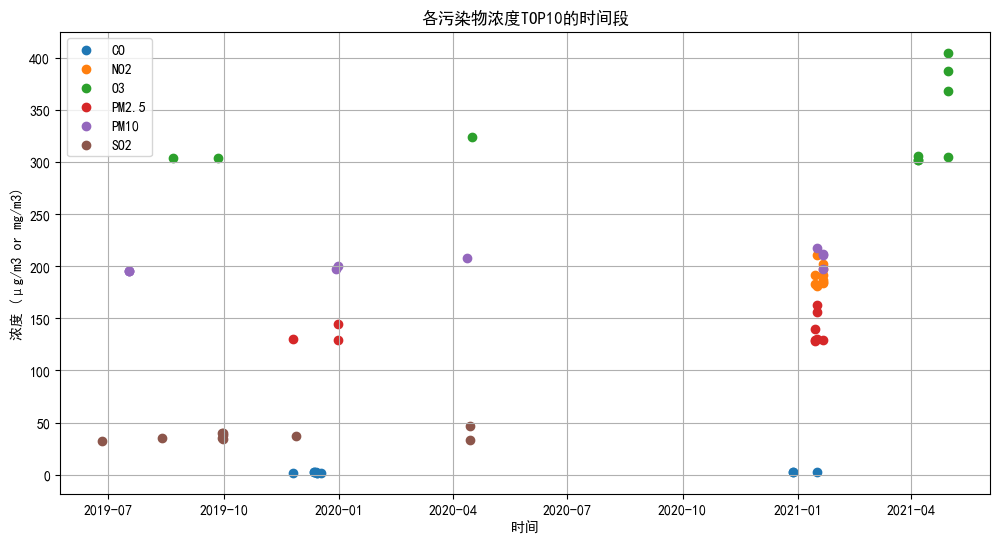

In [79]:
# 绘制散点图
fig, ax = plt.subplots(figsize=(12, 6))
for pollutant in alias:
    x = df_joined['监测时间']  # 时间列
    y = df_joined[pollutant]  # 最高浓度列
    ax.scatter(x, y, label=pollutant)
ax.legend()
ax.set_title('各污染物浓度TOP10的时间段')
ax.set_xlabel('时间')
ax.set_ylabel('浓度 (μg/m3 or mg/m3)')
ax.grid(True) # 网格线
plt.show()